# BCN Accidents 2023

##### We will like to study BCN traffic accidents in 2023.

In [28]:
%matplotlib inline
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn import preprocessing, svm # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.linear_model import LinearRegression # type: ignore

df = pd.read_csv("2023_accidents_causa_conductor_gu_bcn_.csv", index_col=0)
df.head()

,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_mediata,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud_WGS84,Latitud_WGS84
Numero_expedient,,,,,,,,,,,,,,,,,,,
2023S000699,-1,Desconegut,-1,Desconegut,-1,Rovira (ascendent) ...,0,Dissabte,2023,2,Febrer,4,16,Tarda,Manca d'atenció a la conducció,430443.36,4585232.00,2.166596,41.413783
2023S005197,-1,Desconegut,-1,Desconegut,-1,Estatut de Catalunya ...,11,Divendres,2023,9,Setembre,1,13,Matí,No respectar distàncies,429493.73,4587108.15,2.155015,41.430598
2023S007430,-1,Desconegut,-1,Desconegut,-1,Rovira (ascendent) ...,0,Divendres,2023,12,Desembre,15,11,Matí,No respectar distàncies,430443.36,4585232.00,2.166596,41.413783
2023S000961,-1,Desconegut,-1,Desconegut,-1,Amílcar ...,120,Dissabte,2023,1,Gener,28,14,Tarda,No respectat pas de vianants,430955.45,4586335.10,2.172596,41.423762
2023S006486,-1,Desconegut,-1,Desconegut,-1,Augusta / Hort de la Vila ...,NaN,Dijous,2023,11,Novembre,2,14,Tarda,Desobeir semàfor,426883.33,4583690.92,2.124189,41.399587


In [29]:
df.columns

Index(['Codi_districte', 'Nom_districte', 'Codi_barri', 'Nom_barri',
       'Codi_carrer', 'Nom_carrer', 'Num_postal ', 'Descripcio_dia_setmana',
       'NK_Any', 'Mes_any', 'Nom_mes', 'Dia_mes', 'Hora_dia',
       'Descripcio_torn', 'Descripcio_causa_mediata', 'Coordenada_UTM_X_ED50',
       'Coordenada_UTM_Y_ED50', 'Longitud_WGS84', 'Latitud_WGS84'],
      dtype='object')

1. Title: 2023_ACCIDENTS_CAUSA_CONDUCTOR_GU_BCN_.csv

2. Sources:
   (a) Origin:  https://opendata-ajuntament.barcelona.cat/data/es/dataset/accidents_causa_conductor_gu_bcn/resource/5a040155-38b3-4b19-a4b0-c84a0618d363
   (b) Creator:  Guardia Urbana - Ajuntament de Barcelona 
   (c) Date: 08/02/2024

3. Relevant Information:

   Accidentes según causa gestionados por la Guàrdia Urbana a la ciutat de Barcelona

4. Number of Instances: 8897

5. Number of Attributes: 20/4

6. Original Attribute Information:

    01.Numero_expedient
    02.Codi_districte
    03.Nom_districte
    04.Codi_barri
    05.Nom_barri
    06.Codi_carrer
    07.Nom_carrer
    08.Num_postal
    09.Descripcio_dia_setmana
    10.NK_Any 
   11.Mes_any
   12.Nom_mes
   13.Dia_mes
   14.Hora_dia
   15.Descripcio_torn
   16.Descripcio_causa_mediata
   17.Coordenada_UTM_X_ED50
   18.Coordenada_UTM_Y_ED50
   19.Longitud_WGS84
   20.Latitud_WGS84

7. Final Attribute Information:
   01.   Nom_districte
   02.   Descripcio_dia_setmana
   03.   Descripcio_torn
   04.   Descripcio_causa_mediata

In [30]:
print('The shape of our features is:', df.shape)

The shape of our features is: (8897, 19)


In [31]:
# Check if there is any missing value
df.isna().sum()

Codi_districte              0
Nom_districte               0
Codi_barri                  0
Nom_barri                   0
Codi_carrer                 0
Nom_carrer                  0
Num_postal                  4
Descripcio_dia_setmana      0
NK_Any                      0
Mes_any                     0
Nom_mes                     0
Dia_mes                     0
Hora_dia                    0
Descripcio_torn             0
Descripcio_causa_mediata    0
Coordenada_UTM_X_ED50       0
Coordenada_UTM_Y_ED50       0
Longitud_WGS84              0
Latitud_WGS84               0
dtype: int64

In [32]:
# Check if there is any null value
df.isnull().sum()

Codi_districte              0
Nom_districte               0
Codi_barri                  0
Nom_barri                   0
Codi_carrer                 0
Nom_carrer                  0
Num_postal                  4
Descripcio_dia_setmana      0
NK_Any                      0
Mes_any                     0
Nom_mes                     0
Dia_mes                     0
Hora_dia                    0
Descripcio_torn             0
Descripcio_causa_mediata    0
Coordenada_UTM_X_ED50       0
Coordenada_UTM_Y_ED50       0
Longitud_WGS84              0
Latitud_WGS84               0
dtype: int64

In [33]:
# just one column 'Num_postal' with some nulls. Anyway, we don't need this column. 

# So let's clear the no need it ones before

df.reindex()
df.drop(["Codi_districte", "Codi_barri", "Nom_barri","Codi_carrer", "Nom_carrer", "Dia_mes", "NK_Any", "Mes_any", "Nom_mes", "Hora_dia"], axis=1, inplace=True)
df.drop(df.columns[1], axis=1, inplace=True)
df= df.iloc[:,:-4]


In [34]:
# End it with 4 meanfull columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8897 entries, 2023S000699     to 2023S004812    
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Nom_districte             8897 non-null   object
 1   Descripcio_dia_setmana    8897 non-null   object
 2   Descripcio_torn           8897 non-null   object
 3   Descripcio_causa_mediata  8897 non-null   object
dtypes: object(4)
memory usage: 347.5+ KB


#### Studying data

In [35]:
# Traffic accidents by district
df_district = df['Nom_districte'].value_counts()
df_district

Nom_districte
Eixample               2407
Sant Martí             1069
Sarrià-Sant Gervasi     977
Sants-Montjuïc          954
Les Corts               655
Horta-Guinardó          651
Sant Andreu             612
Nou Barris              527
Ciutat Vella            507
Gràcia                  434
Desconegut              104
Name: count, dtype: int64

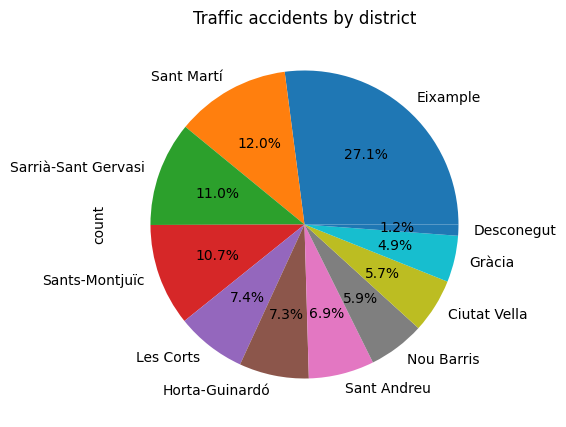

In [36]:
df_district.plot(kind='pie', 
             stacked=True,
             figsize=(10, 5),
             autopct='%1.1f%%')

plt.title('Traffic accidents by district')

plt.show()

###### So 39% of accident were in 2 districts: Eixample & Sarrià-Sant Gervasi

In [37]:
# Traffic accidents by day of the week
df_day = df['Descripcio_dia_setmana'].value_counts()
df_day

Descripcio_dia_setmana
Divendres    1455
Dimecres     1428
Dijous       1414
Dimarts      1364
Dilluns      1340
Dissabte     1054
Diumenge      842
Name: count, dtype: int64

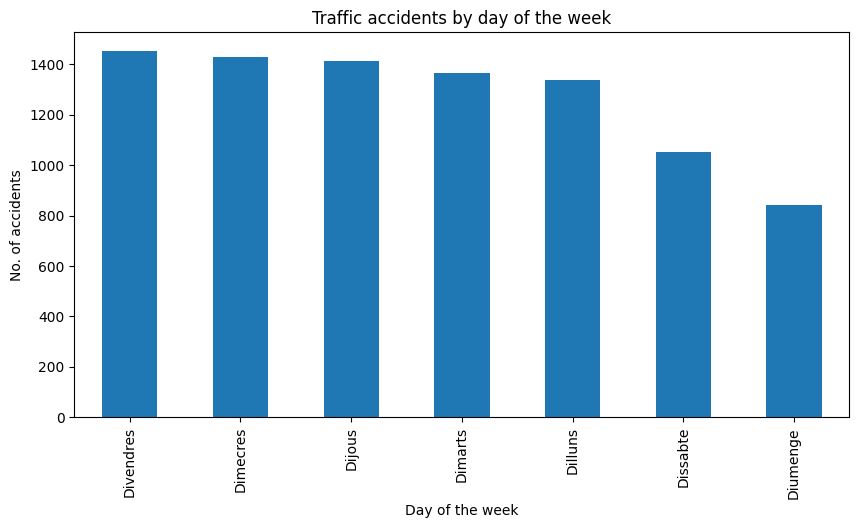

In [38]:
df_day.plot(kind='bar', 
             stacked=False,
             figsize=(10, 5))

plt.title('Traffic accidents by day of the week')
plt.ylabel('No. of accidents')
plt.xlabel('Day of the week')

plt.show()

###### So the day with more accidents was friday

In [39]:
# Traffic accidents by morning/evening shift
#df['Descripcio_torn']= df['Descripcio_torn'].str.replace('Matí', 'Dia')
df_shift = df['Descripcio_torn'].value_counts()
df_shift

Descripcio_torn
Tarda    4491
Matí     3302
Nit      1104
Name: count, dtype: int64

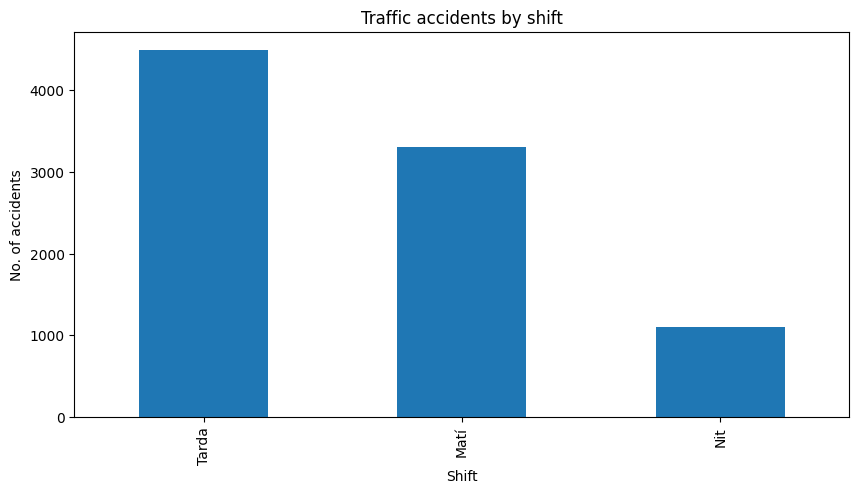

In [40]:
df_shift.plot(kind='bar', 
             stacked=False,
             figsize=(10, 5))

plt.title('Traffic accidents by shift')
plt.ylabel('No. of accidents')
plt.xlabel('Shift')

plt.show()

###### So almost 50% of accident were in the evening.

In [41]:
df_causes = df['Descripcio_causa_mediata'].value_counts()
df_causes

Descripcio_causa_mediata
Manca d'atenció a la conducció             2061
Altres                                     1089
No respectar distàncies                     996
Gir indegut o sense precaució               804
No determinada                              743
Canvi de carril sense precaució             666
Desobeir semàfor                            640
Desobeir altres senyals                     457
Desconegut                                  377
Avançament defectuós/improcedent            296
No respectat pas de vianants                241
Manca precaució incorporació circulació     238
Manca precaució efectuar marxa enrera       177
No cedir la dreta                            72
Envair calçada contrària                     25
Fallada mecànica o avaria                    15
Name: count, dtype: int64

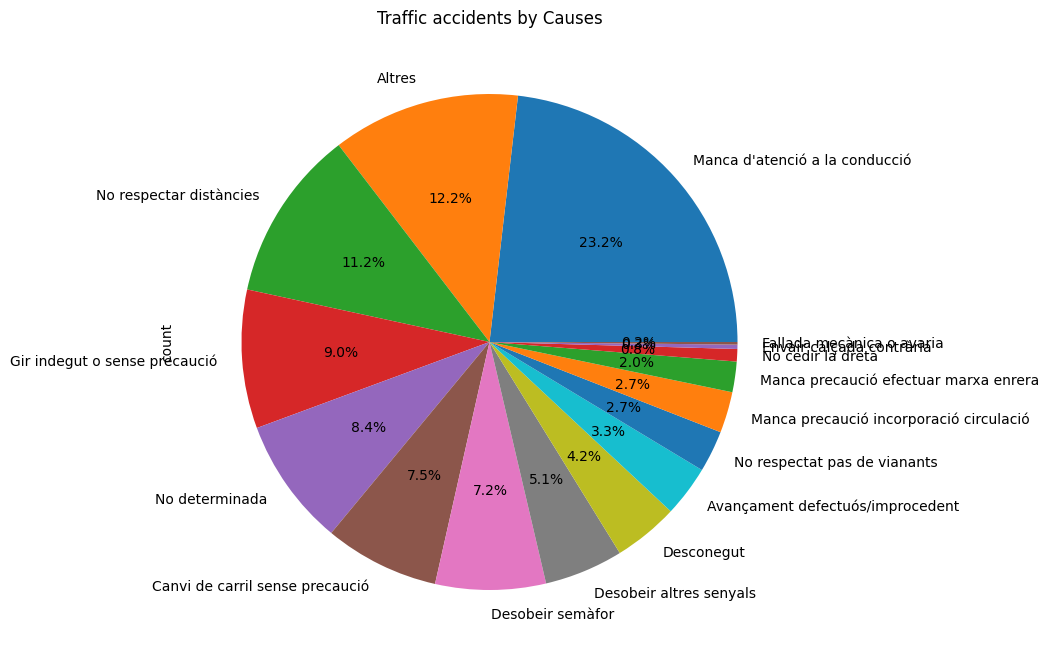

In [42]:
df_causes.plot(kind='pie', 
             stacked=True,
             figsize=(8, 14),
             autopct='%1.1f%%')

plt.title('Traffic accidents by Causes')

plt.show()

###### Causes: 23,17% Distraction & poor attention while driving! ("Manca d'Atenció")

['Altres', 
'Avançament defectuós/improcedent', 
'Canvi de carril sense precaució', 
'Desconegut', 
'Desobeir altres senyals', 
'Desobeir semàfor', 
'Envair calçada contrària', 
'Fallada mecànica o avaria', 
'Gir indegut o sense precaució', 
"Manca d'atenció a la conducció", 
'Manca precaució efectuar marxa enrera', 
'Manca precaució incorporació circulació', 
'No cedir la dreta', 
'No determinada', 
'No respectar distàncies', 
'No respectat pas de vianants']

#### Preparing data
###### We'll need to convert categorical features to dummy variables.

In [43]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data = le.fit_transform(df['Descripcio_torn'])
df['Descripcio_torn'] = data

In [44]:
data1 = le.fit_transform(df['Nom_districte'])
df['Nom_districte'] = data1

In [45]:
data2 = le.fit_transform(df['Descripcio_dia_setmana'])
df['Descripcio_dia_setmana'] = data2

In [46]:
df.describe()

,Nom_districte,Descripcio_dia_setmana,Descripcio_torn
count,8897.000000,8897.000000,8897.000000
mean,5.221198,2.867034,1.133641
std,3.184923,2.034154,0.926364
min,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000
50%,5.000000,3.000000,2.000000
75%,8.000000,5.000000,2.000000
max,10.000000,6.000000,2.000000


In [47]:
df= df.drop([ 'Descripcio_causa_mediata'], axis = 1)
df.head()

,Nom_districte,Descripcio_dia_setmana,Descripcio_torn
Numero_expedient,,,
2023S000699,1,4,2
2023S005197,1,6,0
2023S007430,1,6,0
2023S000961,1,4,2
2023S006486,1,0,2


array([[<Axes: title={'center': 'Nom_districte'}>,
        <Axes: title={'center': 'Descripcio_dia_setmana'}>],
       [<Axes: title={'center': 'Descripcio_torn'}>, <Axes: >]],
      dtype=object)

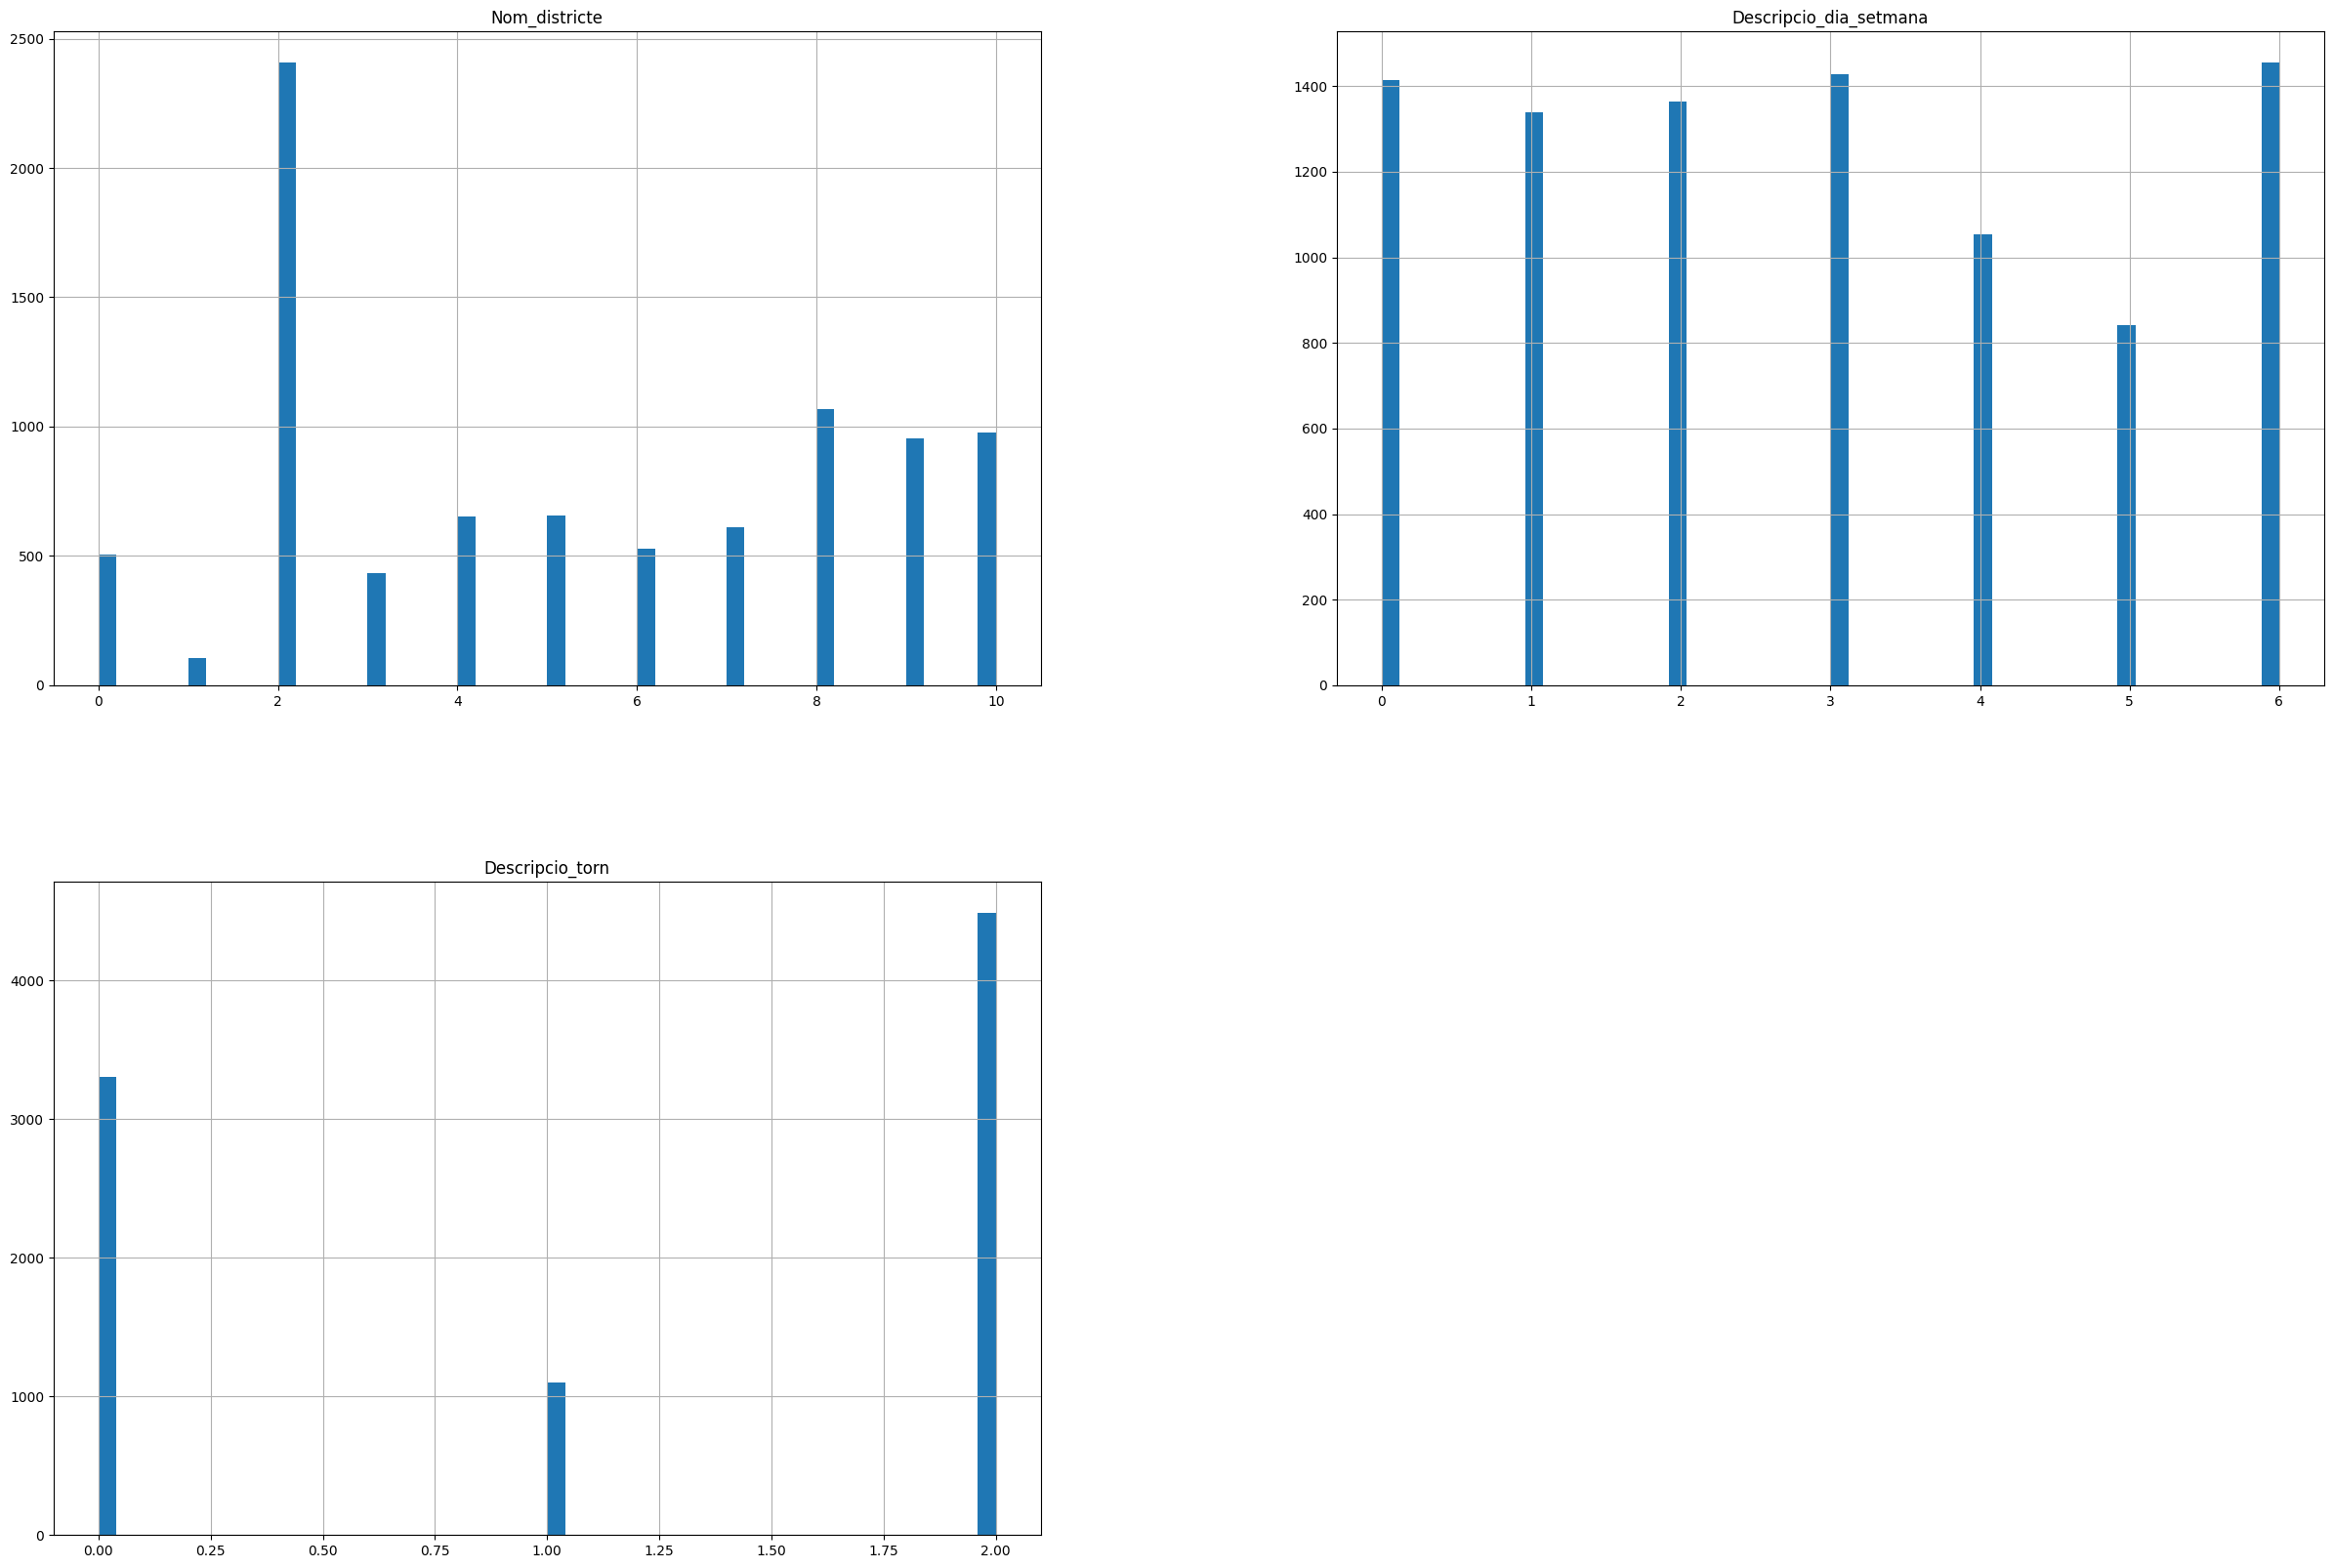

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(30,20))

In [49]:
# check correlation
df.corr(numeric_only=True)


,Nom_districte,Descripcio_dia_setmana,Descripcio_torn
Nom_districte,1.000000,0.010683,-0.022212
Descripcio_dia_setmana,0.010683,1.000000,0.025896
Descripcio_torn,-0.022212,0.025896,1.000000


<Axes: >

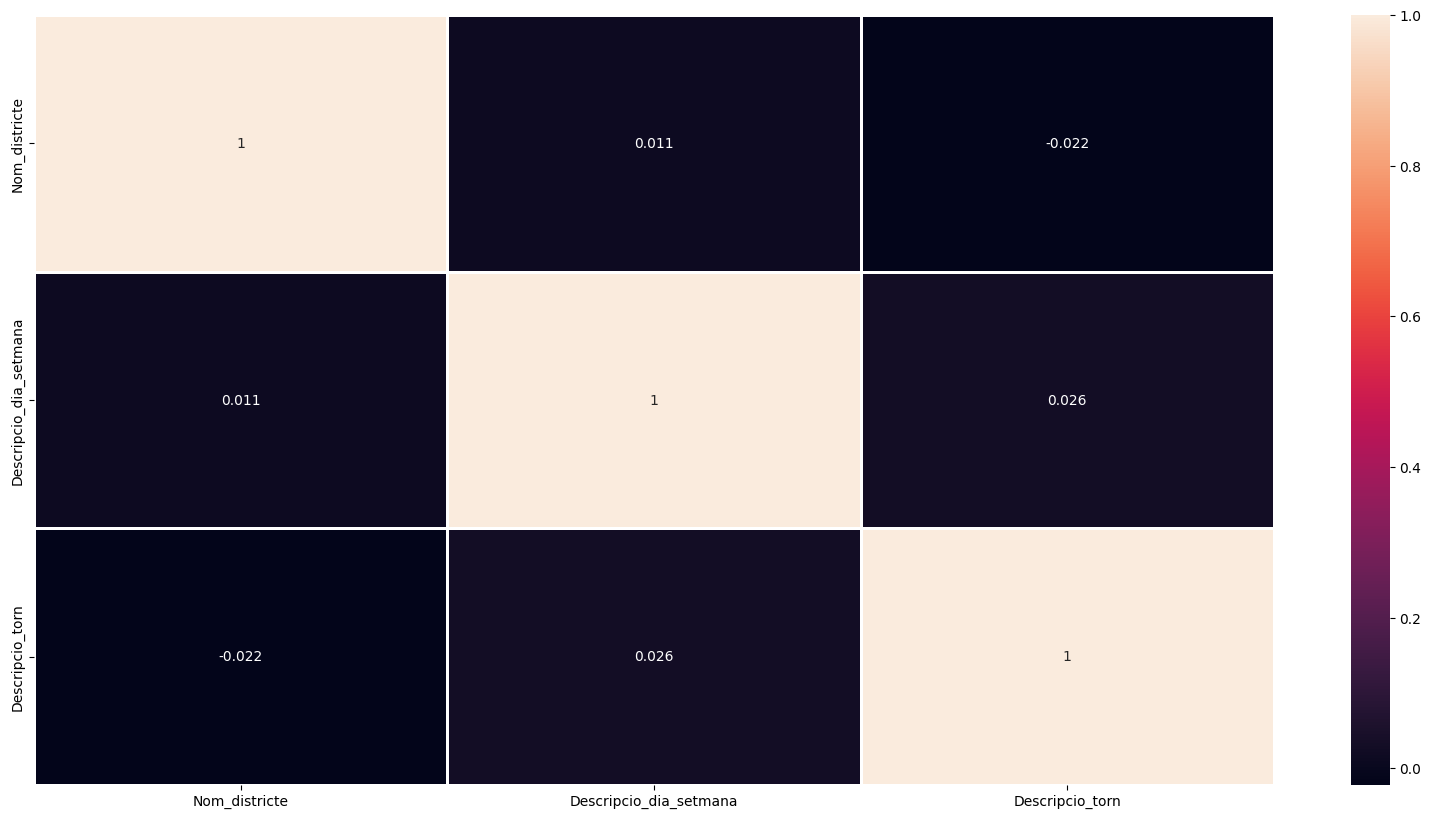

In [50]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(numeric_only=True) , annot=True , lw=1 )

###### Seems Shift "Torn" has a some correlation to weekdays accidents. 
##### 
###### Let's see a Linear regressions apply to this.

#### Set Train/Test

In [51]:
from sklearn.model_selection import train_test_split

#dataset & Prepare Target
# X, y = datasets.load_iris(return_X_y=True)
y = np.array(df["Descripcio_torn"])
X= df.drop(["Descripcio_torn"], axis = 1)
X_list = list(X.columns)

# 40% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5338, 2)
(3559, 2)
(5338,)
(3559,)


#### Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression

#instance of our model
model = LinearRegression().fit(X_train, y_train)
# coefficient of determinatios = .score
r_sq = model.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.0011528098804353126


In [54]:
print(f"intercept b0: {model.intercept_}")
print(f"slope b1: {model.coef_}")

intercept b0: 1.1220167425879732
slope b1: [-0.00527502  0.01319194]


In [55]:
#predict new data -> b0+b1*x
y_pred_model1 = model.predict(X_test)
print(f"predicted response:\n{y_pred_model1}")

predicted response:
[1.13258432 1.19061835 1.15632631 ... 1.11939238 1.13785058 1.15104252]


<Axes: ylabel='Count'>

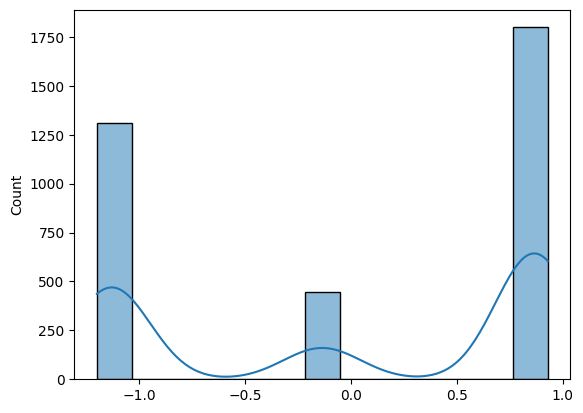

In [56]:
#Visualizing the test set results: 
sns.histplot(y_test-y_pred_model1, kde=True)

In [57]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean_Squared_Error : ' , mean_squared_error(y_test,y_pred_model1) )
print('Root_Mean_Squared_Error : ', r2_score(y_test,y_pred_model1))

Mean_Squared_Error :  0.8544410632602708
Root_Mean_Squared_Error :  0.0011184716945623618


###### R2= poor

In [58]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
# linear model
model = LinearRegression().fit(X_train, y_train)
predi_train = model.predict(X_train)
predi_test = model.predict(X_test)

print('Mean_Absolute_Error Train : ' , mean_absolute_error(predi_train, y_train))
print('Mean_Squared_Error Train: ' , mean_squared_error(predi_train, y_train))
print('Mean_Absolute_Error Test : ' ,mean_absolute_error(predi_test, y_test))
print('Mean_Squared_Error Test: ' ,mean_squared_error(predi_test, y_test))

Mean_Absolute_Error Train :  0.8757505410957188
Mean_Squared_Error Train:  0.8588214689934776
Mean_Absolute_Error Test :  0.8720346419599544
Mean_Squared_Error Test:  0.8544410632602708


In [59]:
# linear model MODIFICATED
model_modif = LinearRegression(fit_intercept=False, copy_X=True, n_jobs=2, positive=True ).fit(X_train, y_train)
predi_train_modif = model_modif.predict(X_train)
predi_test_modif = model_modif.predict(X_test)

print('Mean_Absolute_Error Train : ' ,  mean_absolute_error(predi_train_modif, y_train))
print('Mean_Squared_Error Train: ' , mean_squared_error(predi_train_modif, y_train))
print('Mean_Absolute_Error Test : ' , mean_absolute_error(predi_test_modif, y_test))
print('Mean_Squared_Error Test: ' , mean_squared_error(predi_test_modif, y_test))

Mean_Absolute_Error Train :  0.9278271973702282
Mean_Squared_Error Train:  1.0847643143387757
Mean_Absolute_Error Test :  0.9308385365218101
Mean_Squared_Error Test:  1.0866728046633114


###### So Params has a huge impact in the results; in this case, results and Accuracy has improve !!

###### Validació interna

In [60]:
# our original linear model
model = LinearRegression().fit(X_train, y_train)
predi_train = model.predict(X_train)
predi_test = model.predict(X_test)

print('Mean_Absolute_Error Train : ' , mean_absolute_error(predi_train, y_train))
print('Mean_Squared_Error Train: ' , mean_squared_error(predi_train, y_train))
print('Mean_Absolute_Error Test : ' ,mean_absolute_error(predi_test, y_test))
print('Mean_Squared_Error Test: ' ,mean_squared_error(predi_test, y_test))

Mean_Absolute_Error Train :  0.8757505410957188
Mean_Squared_Error Train:  0.8588214689934776
Mean_Absolute_Error Test :  0.8720346419599544
Mean_Squared_Error Test:  0.8544410632602708


In [61]:
# aplicar cross-validation: GridSearchCV
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid={'n_estimators': range(100, 500, 50),'max_features': range(2, 5, 1) }
gsc = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, scoring='r2', cv=5)

grid_model = gsc.fit(X_train, y_train)
predi_grid_train = grid_model.predict(X_train)
predi_grid_test = grid_model.predict(X_test)

print('Mean_Absolute_Error Train : ' , mean_absolute_error(predi_grid_train, y_train))
print('Mean_Squared_Error Train: ' , mean_squared_error(predi_grid_train, y_train))
print('Mean_Absolute_Error Test : ' ,mean_absolute_error(predi_grid_test, y_test))
print('Mean_Squared_Error Test: ' ,mean_squared_error(predi_grid_test, y_test))

Mean_Absolute_Error Train :  0.8654654715728107
Mean_Squared_Error Train:  0.8452803662684644
Mean_Absolute_Error Test :  0.8735032232240589
Mean_Squared_Error Test:  0.8628394662030746


###### With cross-validation seems Accuracy is worse.